Let's sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
houses = pd.read_table("AmesHousing_1.txt")

In [3]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
print(houses['SalePrice'].sample(1, random_state = 0))

2216    220000
Name: SalePrice, dtype: int64


We can see we got a price of $220,000. Is a house costing $220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether $220,000 is below or above the mean:

In [5]:
print(houses['SalePrice'].mean())

180796.0600682594


The sampled house (`$220,000`) is clearly more expensive than the average house (roughly `$180,796`), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

In [7]:
# one SD value
houses["SalePrice"].std(ddof=0)

79873.05865192247

In [ ]:
houses["SalePrice"].plot.kde(xlim=(min(houses["SalePrice"]), max(houses["SalePrice"])))

plt.axvline( houses["SalePrice"].mean(), c = "Black", label = 'Mean')
#Standard deviation above the Mean
plt.axvline( houses["SalePrice"].mean() + houses["SalePrice"].std(ddof=0), c = "Red", label = 'Standard deviation')
plt.axvline(220000, c = "Orange", label = '220000')
plt.legend()
plt.show()

The sale price of `$220,000` is NOT very expensive since it is within one SD (1$\sigma$) limit

### 2. Number of Standard Deviations


Find out the number of standard deviations away from the mean for a price of `$220,000` in the distribution of the `SalePrice` variable.

In [9]:
st_devs_away = (220000 - houses["SalePrice"].mean())/houses["SalePrice"].std(ddof=0)
st_devs_away

0.4908280788718362

### 3. Z-scores

The value representing the number of standard deviations away from the mean is commonly known as **the standard score**, or the **z-score**. 
\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}

A z-score has two parts:

- **The sign**, which indicates whether the value is above or below the mean.
- **The value**, which indicates the number of standard deviations that a value is away from the mean.

In [13]:
from numpy import std
def z_score(value, array, bessel=0):
    zscore = (value - array.mean())/std(array, ddof=bessel)
    return zscore

In [11]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

In [14]:
min_z = z_score(min_val, houses['SalePrice'])
min_z

-2.1034258973406126

In [15]:
mean_z = z_score(mean_val, houses['SalePrice'])
mean_z

0.0

In [16]:
max_z = z_score(max_val, houses['SalePrice'])
max_z

7.188956446929806

### 4. Locating Values in Different Distributions

In [17]:
locations = ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst']

z_scores = {}
budget = 200000

for location in locations:
    z_scores[location] = z_score(budget, houses[houses['Neighborhood'] == location]["SalePrice"])

In [18]:
z_scores

{'NAmes': 1.7239665910370237,
 'CollgCr': -0.03334366282705464,
 'OldTown': 1.7183080926865524,
 'Edwards': 1.443576193848941,
 'Somerst': -0.5186390646965722}

So, best investment location will be `College Creek` since the z-score of SalePrice in this location is closet to z-score of mean(the mean of a distribution has a z-score of `0`)

### 5. Transforming Distributions

<Figure size 792x252 with 0 Axes>

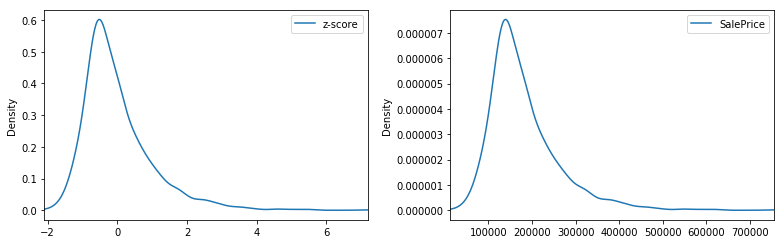

In [25]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                ), label = 'z-score'
                        )
plt.legend()
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     ), label = 'SalePrice'
                            )

plt.legend()
plt.tight_layout() # otherwise the plots will overlay partially


Notice that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores

In [29]:
z_mean_price = houses["z_prices"].mean()
z_mean_price

-1.1429992333726227e-16

In [30]:
z_stdev_price = std(houses["z_prices"], ddof=0)
z_stdev_price

1.0000000000000002

In [26]:
#Transform the distribution of the Lot Area variable into a distribution of z-scores
houses["z_area"] = houses["Lot Area"].apply(lambda x: (x - houses["Lot Area"].mean())/std(houses["Lot Area"], ddof=0))


In [27]:
z_mean_area = houses["z_area"].mean()
z_mean_area

8.771898641662927e-18

In [28]:
z_stdev_area = std(houses["z_area"],ddof=0)
z_stdev_area

0.9999999999999997

**Comparing the mean and sd values**:

The mean values were both extremely close to 0. In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1.
Notice that when we transform to z-scores, the initial values are practically relabeled and the relative location of each value in the distribution is perfectly preserved. This explains why the shape of the original distribution is preserved, and it also means that the location of the mean and the standard deviation is preserved as well.

### 6. The Standard Distribution

A distribution of z-scores is often called a **standard distribution** (remember that z-scores are also called standard scores). When we convert a distribution to z-scores, we'd say in statistical jargon that we **standardized** the distribution.

In [31]:
from numpy import std, mean
population = [0,8,0,8]

z_score = [(value - mean(population))/std(population,ddof=0) for value in population]

In [32]:
mean_z = mean(z_score)
mean_z

0.0

In [33]:
stdev_z = std(z_score, ddof=0)
stdev_z

1.0

This time we get $\mu_z = 0$ and $\sigma_z = 1$ because there'll be no rounding errors.

### 7. Standardizing Samples

Above, we measured the standard deviation using the formula for the population standard deviation 
σ (the formula without Bessel's correction). **But is it justified to use the formula for the population standard deviation?** Let's instead treat it as a sample and proceed to standardize it.

In [36]:
standardized_sample  = [(value - mean(population))/std(population,ddof=1) for value in population]

In [37]:
mean_z = mean(standardized_sample)
stdev_sample = std(standardized_sample, ddof=1)
stdev_sample

1.0

SD of standarized sample is also `1`.